# Basketball Playoffs Qualification

![Descriptive Image Alt Text](../data/basketballPlayoffs/wnba.jpg)

## Case Description

The WNBA is composed by two conferences, the Eastern and Western conference. During the season, 12 teams (6 from the western and 6 from the eastern conference) play with each other, and try to win as many games as possible. Then is created a new classification, that gatters all 12 teams, and the best 8 teams (4 from the western and 4 from the eastern conference), qualify for the playoffs.

### Objectives

Our main objetive is to use a predictive model to predict which WNBA teams will be making the Playoffs next season, by analysing data from 10 years ago until today. There are many factors to analyse, such as award players received along the years, coaches and their performances in various teams, player performance along the years and team performances along the years.

### About the dataset

The dataset contains data from the last 10 seasons:

- **awards_players.csv**: individual player awards, directly related to players performances during 10 last seasons.
- **coaches.csv**: statistics for team coaches, such as year, coaching team, coaching league (always WBNA in this case), stint, games won and lost,post wins and post losses.
- **players_teams.csv**: most complete player data, with for example points, rebounds, assists etc. 
- **players.csv**: more general player data, such as position of the field, first and lastseason, height, weight, college, birth date, death date (if applies).
- **series_post.csv**: includes results from the Playoffs, such as team wins and loses. 
- **teams_post.csv**: post season performance data. 
- **teams.csv**: general information about team performances during regular season, such as wins, loses, and playoff appearances. 

#### Dataset Atrributes

##### Offensive Statistics:
- **o_fgm**: Field goals made by the team
- **o_fga**: Field goals attempted by the team
- **o_ftm**: Free throws made by the team
- **o_fta**: Free throws attempted by the team
- **o_3pm**: Three-pointers made by the team
- **o_3pa**: Three-pointers attempted by the team
- **o_oreb**: Offensive rebounds by the team
- **o_dreb**: Defensive rebounds by the team
- **o_reb**: Total rebounds by the team
- **o_asts**: Assists made by the team
- **o_pf**: Personal fouls committed by the team
- **o_stl**: Steals made by the team
- **o_to**: Turnovers by the team
- **o_blk**: Blocks made by the team
- **o_pts**: Total points scored by the team

##### Defensive Statistics:
- **d_fgm**: Field goals made by opponents
- **d_fga**: Field goals attempted by opponents
- **d_ftm**: Free throws made by opponents
- **d_fta**: Free throws attempted by opponents
- **d_3pm**: Three-pointers made by opponents
- **d_3pa**: Three-pointers attempted by opponents
- **d_oreb**: Offensive rebounds by opponents
- **d_dreb**: Defensive rebounds by opponents
- **d_reb**: Total rebounds by opponents
- **d_asts**: Assists made by opponents
- **d_pf**: Personal fouls committed by opponents
- **d_stl**: Steals made by opponents
- **d_to**: Turnovers by opponents
- **d_blk**: Blocks made by opponents
- **d_pts**: Total points scored by opponents

##### Team Rebounding:
- **tmORB**: Team offensive rebounds
- **tmDRB**: Team defensive rebounds
- **tmTRB**: Team total rebounds

##### Opponent Team Rebounding:
- **opptmORB**: Opponent team offensive rebounds
- **opptmDRB**: Opponent team defensive rebounds
- **opptmTRB**: Opponent team total rebounds

##### Season Performance:
- **won**: Games won by the team during the season
- **lost**: Games lost by the team during the season
- **GP**: Games played by the team during the season
- **homeW**: Home games won by the team
- **homeL**: Home games lost by the team
- **awayW**: Away games won by the team
- **awayL**: Away games lost by the team
- **confW**: Conference games won by the team
- **confL**: Conference games lost by the team


### Approach:
- **I - Data Understanding and Exploration**
- **II - Data Analysis**
- **III - Data Preparation**  
- **IV - Modeling**
- **V - Conclusion**

## I - Data Understanding and Exploration

### I.1 - Import Libraries

Here's a list of commonly used libraries:

- `pandas`: for data manipulation and analysis.
- `numpy`: for numerical computing.
- `matplotlib.pyplot`: for creating static, interactive, and animated visualizations.
- `seaborn`: for making statistical graphics.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### I.2 - Read Data

In [129]:
awards_players = pd.read_csv('../data/basketballPlayoffs/awards_players.csv')
coaches = pd.read_csv('../data/basketballPlayoffs/coaches.csv')
players = pd.read_csv('../data/basketballPlayoffs/players.csv')
players_teams = pd.read_csv('../data/basketballPlayoffs/players_teams.csv')
series_post = pd.read_csv('../data/basketballPlayoffs/series_post.csv')
teams = pd.read_csv('../data/basketballPlayoffs/teams.csv')
teams_post = pd.read_csv('../data/basketballPlayoffs/teams_post.csv')

In [130]:
print("Awards Players:")
print(awards_players.head(), "\n")

print("Coaches:")
print(coaches.head(), "\n")

print("Players:")
print(players.head(), "\n")

print("Players Teams:")
print(players_teams.head(), "\n")

print("Series Post:")
print(series_post.head(), "\n")

print("Teams:")
print(teams.head(), "\n")

print("Teams Post:")
print(teams_post.head(), "\n")

Awards Players:
     playerID                               award  year  lgID
0  thompti01w  All-Star Game Most Valuable Player     1  WNBA
1  leslili01w  All-Star Game Most Valuable Player     2  WNBA
2  leslili01w  All-Star Game Most Valuable Player     3  WNBA
3  teaslni01w  All-Star Game Most Valuable Player     4  WNBA
4  swoopsh01w  All-Star Game Most Valuable Player     6  WNBA 

Coaches:
      coachID  year tmID  lgID  stint  won  lost  post_wins  post_losses
0  adamsmi01w     5  WAS  WNBA      0   17    17          1            2
1  adubari99w     1  NYL  WNBA      0   20    12          4            3
2  adubari99w     2  NYL  WNBA      0   21    11          3            3
3  adubari99w     3  NYL  WNBA      0   18    14          4            4
4  adubari99w     4  NYL  WNBA      0   16    18          0            0 

Players:
        bioID  pos  firstseason  lastseason  height  weight  \
0  abrahta01w    C            0           0    74.0     190   
1  abrossv01w    F        

## II - Data Analysis

### II.1 - Verify Data Types

In [131]:
print("Awards Players Data Info:")
awards_players.info()

print("\nCoaches Data Info:")
coaches.info()

print("\nPlayers Data Info:")
players.info()

print("\nPlayers Teams Data Info:")
players_teams.info()

print("\nSeries Post Data Info:")
series_post.info()

print("\nTeams Data Info:")
teams.info()

print("\nTeams Post Data Info:")
teams_post.info()

Awards Players Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  95 non-null     object
 1   award     95 non-null     object
 2   year      95 non-null     int64 
 3   lgID      95 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.1+ KB

Coaches Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   coachID      162 non-null    object
 1   year         162 non-null    int64 
 2   tmID         162 non-null    object
 3   lgID         162 non-null    object
 4   stint        162 non-null    int64 
 5   won          162 non-null    int64 
 6   lost         162 non-null    int64 
 7   post_wins    162 non-null    int64 
 8   post_losses  162 non-null    int64 
dtypes: int64(6), o

### II.2 - Check for Missing Data

In [132]:
print("Missing Values in Awards Players:")
print(awards_players.isnull().sum())

print("\nMissing Values in Coaches:")
print(coaches.isnull().sum())

print("\nMissing Values in Players:")
print(players.isnull().sum())

print("\nMissing Values in Players Teams:")
print(players_teams.isnull().sum())

print("\nMissing Values in Series Post:")
print(series_post.isnull().sum())

print("\nMissing Values in Teams:")
print(teams.isnull().sum())

print("\nMissing Values in Teams Post:")
print(teams_post.isnull().sum())

Missing Values in Awards Players:
playerID    0
award       0
year        0
lgID        0
dtype: int64

Missing Values in Coaches:
coachID        0
year           0
tmID           0
lgID           0
stint          0
won            0
lost           0
post_wins      0
post_losses    0
dtype: int64

Missing Values in Players:
bioID             0
pos              78
firstseason       0
lastseason        0
height            0
weight            0
college         167
collegeOther    882
birthDate         0
deathDate         0
dtype: int64

Missing Values in Players Teams:
playerID              0
year                  0
stint                 0
tmID                  0
lgID                  0
GP                    0
GS                    0
minutes               0
points                0
oRebounds             0
dRebounds             0
rebounds              0
assists               0
steals                0
blocks                0
turnovers             0
PF                    0
fgAttempted         

No missing values in Awards Players
No missing values in Coaches


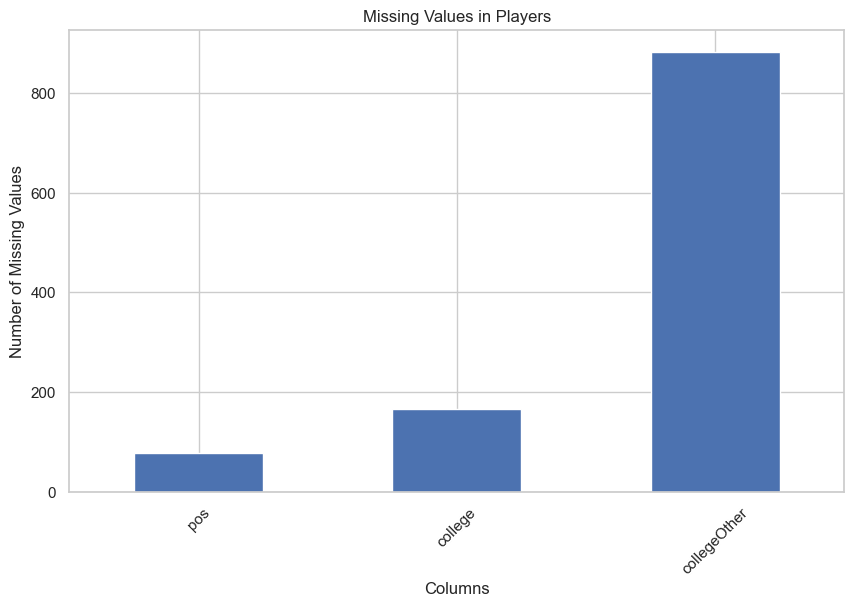

No missing values in Players Teams
No missing values in Series Post


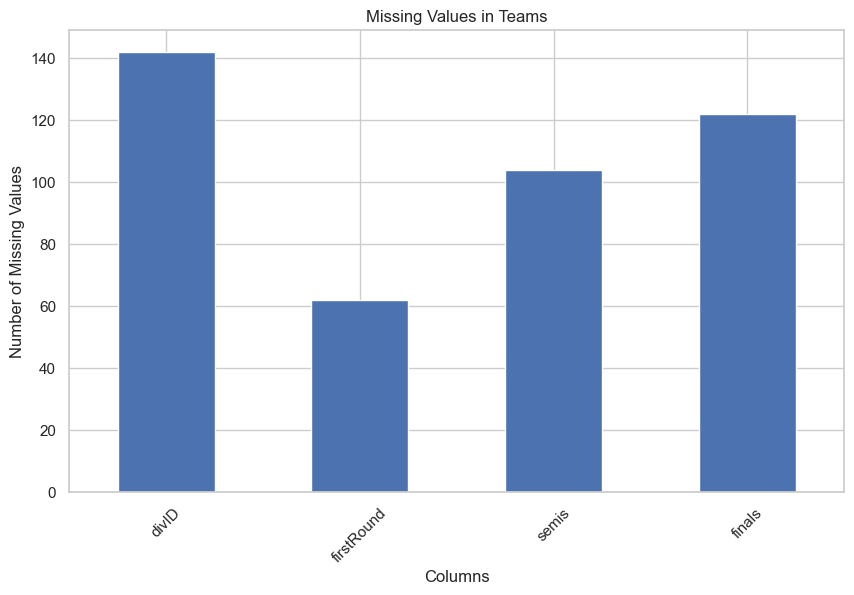

No missing values in Teams Post


In [133]:
import matplotlib.pyplot as plt

def plot_missing_values(df, title):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]  
    
    if len(missing_values) > 0:
        plt.figure(figsize=(10, 6))
        missing_values.plot(kind='bar')
        plt.title(f'Missing Values in {title}')
        plt.ylabel('Number of Missing Values')
        plt.xlabel('Columns')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f'No missing values in {title}')

plot_missing_values(awards_players, 'Awards Players')
plot_missing_values(coaches, 'Coaches')
plot_missing_values(players, 'Players')
plot_missing_values(players_teams, 'Players Teams')
plot_missing_values(series_post, 'Series Post')
plot_missing_values(teams, 'Teams')
plot_missing_values(teams_post, 'Teams Post')

The next step would be to decide how to solve and what to do with the missing data. We decided to 

### II.3 - Check for Outliers

Summary Statistics

In [134]:
print(players_teams.describe())
print(teams.describe())


              year        stint           GP           GS      minutes  \
count  1876.000000  1876.000000  1876.000000  1876.000000  1876.000000   
mean      5.326226     0.113539    24.320896    12.438166   501.269190   
std       2.905475     0.422574    10.460614    13.641697   359.566117   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%       3.000000     0.000000    17.000000     0.000000   165.000000   
50%       5.000000     0.000000    29.000000     5.000000   459.000000   
75%       8.000000     0.000000    32.000000    29.000000   826.250000   
max      10.000000     3.000000    34.000000    34.000000  1234.000000   

            points    oRebounds    dRebounds     rebounds      assists  ...  \
count  1876.000000  1876.000000  1876.000000  1876.000000  1876.000000  ...   
mean    176.261727    24.388060    54.334755    78.722814    39.031983  ...   
std     161.983839    23.325974    48.347088    69.210226    40.147037  ...   
min       0.00000

Check Data Types

In [135]:
print(teams.dtypes)


year         int64
lgID        object
tmID        object
franchID    object
confID      object
             ...  
confW        int64
confL        int64
min          int64
attend       int64
arena       object
Length: 61, dtype: object


# Remove unnecessary columns from the awards_players DataFrame (example)

In [136]:
# awards_players = awards_players.drop(columns=['lgID'])

# Save the cleaned DataFrame back to the same CSV file

In [137]:
# awards_players.to_csv('../data/basketballPlayoffs/awards_players.csv', index=False)